In [41]:
from __init__ import *

In [42]:
#summary statics 
df=pd.read_csv("../data/benin-malanville.csv")
summary_stats=df.describe()
print(summary_stats)

                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.000000       2.100000       0.000000   
25%         0.000000      24.2000

In [43]:
# check for missing values
missing_values=df.isnull().sum()
print("Missing values:\n",missing_values)

Missing values:
 Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


In [44]:
#checking fofr outlier or incorrect entries
numeric_columns=['GHI',"DNI",'DHI',"WS",'WSgust','ModA',"ModB","Tamb","RH","WD","TModA","Precipitation","WSstdev","WDstdev","BP"]
for col in numeric_columns:
    print(f'Summary for {col}:\n',df[col].describe())
    if (df[col]<0).any():
        print(f'negative values found in {col}')
    

Summary for GHI:
 count    525600.000000
mean        240.559452
std         331.131327
min         -12.900000
25%          -2.000000
50%           1.800000
75%         483.400000
max        1413.000000
Name: GHI, dtype: float64
negative values found in GHI
Summary for DNI:
 count    525600.000000
mean        167.187516
std         261.710501
min          -7.800000
25%          -0.500000
50%          -0.100000
75%         314.200000
max         952.300000
Name: DNI, dtype: float64
negative values found in DNI
Summary for DHI:
 count    525600.000000
mean        115.358961
std         158.691074
min         -12.600000
25%          -2.100000
50%           1.600000
75%         216.300000
max         759.200000
Name: DHI, dtype: float64
negative values found in DHI
Summary for WS:
 count    525600.000000
mean          2.121113
std           1.603466
min           0.000000
25%           1.000000
50%           1.900000
75%           3.100000
max          19.500000
Name: WS, dtype: float64
Sum

In [ ]:
# check for outlier using the IOR method
df_clean=df.copy()
for col in numeric_columns:
    z_scores=stats.zscore(df[col].dropna())
    df_clean=df_clean[(abs(z_scores) < 3)]
df = pd.read_csv('../data/benin-malanville.csv')# reloded needed becouse of some column removal

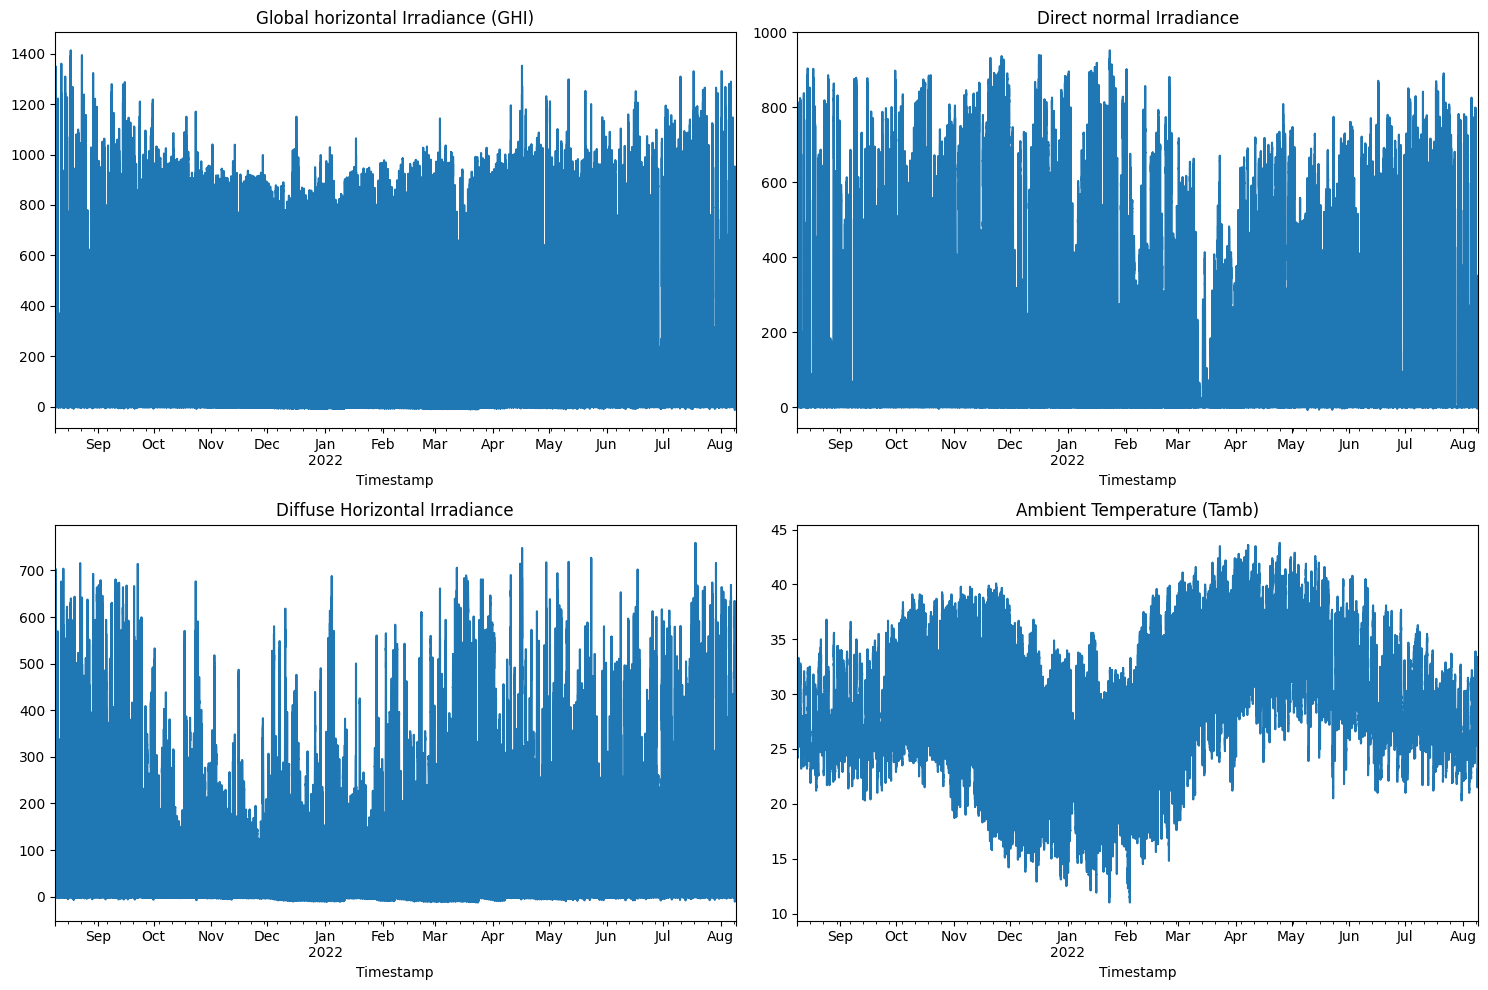

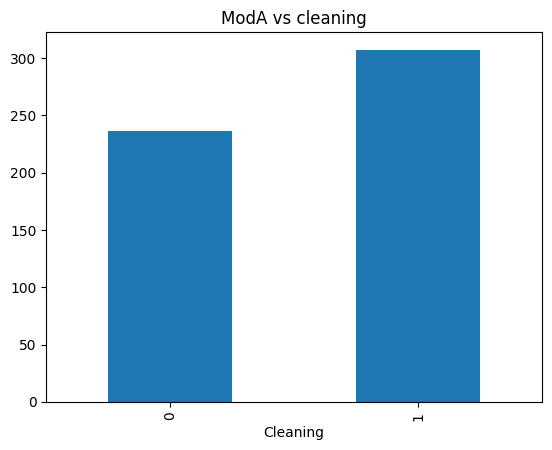

In [40]:
#time series analysis
df["Timestamp"]=pd.to_datetime(df['Timestamp'])
df.set_index("Timestamp",inplace=True)
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
df['GHI'].plot(title="Global horizontal Irradiance (GHI)")
plt.subplot(2,2,2)
df['DNI'].plot(title="Direct normal Irradiance")
plt.subplot(2,2,3)
df['DHI'].plot(title="Diffuse Horizontal Irradiance")
plt.subplot(2,2,4)
df['Tamb'].plot(title="Ambient Temperature (Tamb)")
plt.tight_layout()
plt.show()
#plot cleaning impact
df.groupby('Cleaning')['ModA'].mean().plot(kind='bar',title='ModA vs cleaning')
plt.show()


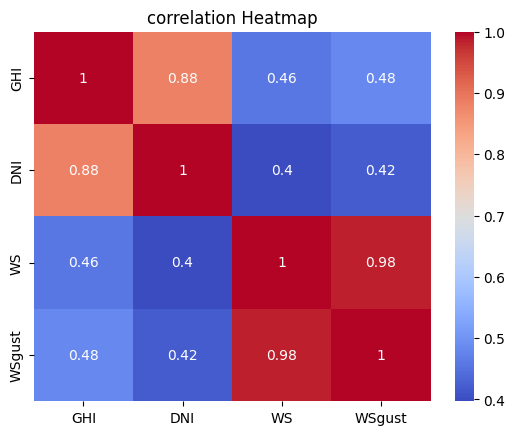

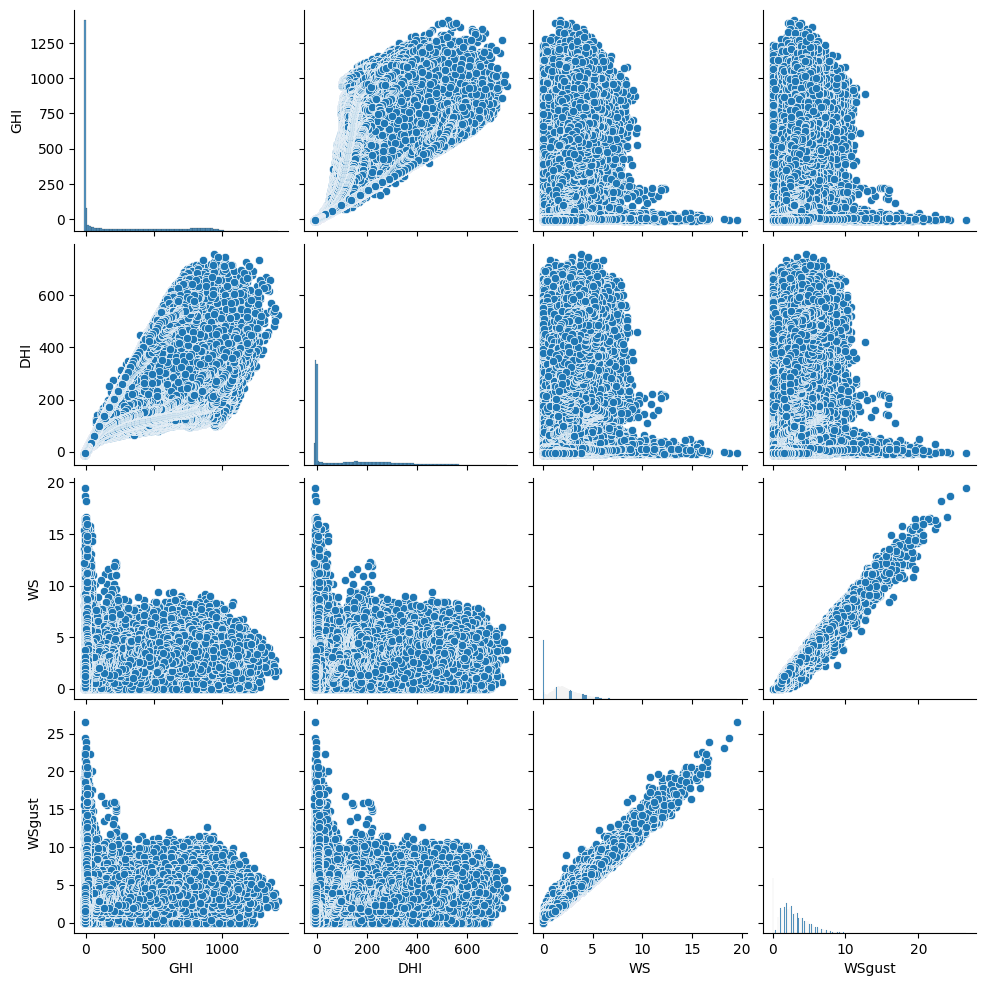

In [47]:
# correlation analysis  
#correlation heatmap
correlation_matrix=df[["GHI","DNI","WS","WSgust"]].corr()
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.title("correlation Heatmap")
plt.show()

#scatter matrices
sns.pairplot(df[["GHI",'DHI','WS','WSgust']])
plt.show()

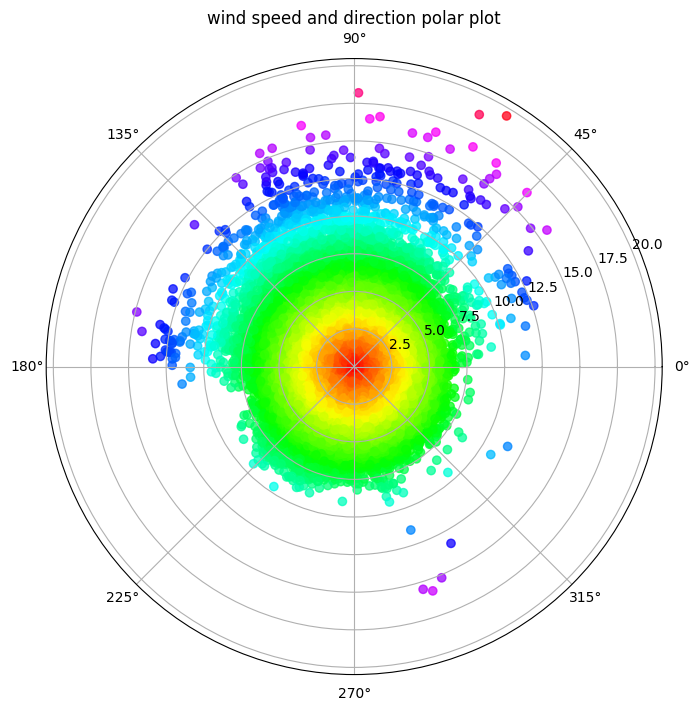

In [49]:
#wind analysis
# wind speed and direction polat plot
plt.figure(figsize=(8,8))
ax=plt.subplot(111,projection='polar')
wind_dir=np.deg2rad(df['WD'].dropna())
wind_speed=df['WS'].dropna()
ax.scatter(wind_dir, wind_speed, c=wind_speed, cmap='hsv', alpha=0.75)
plt.title("wind speed and direction polar plot")
plt.show()

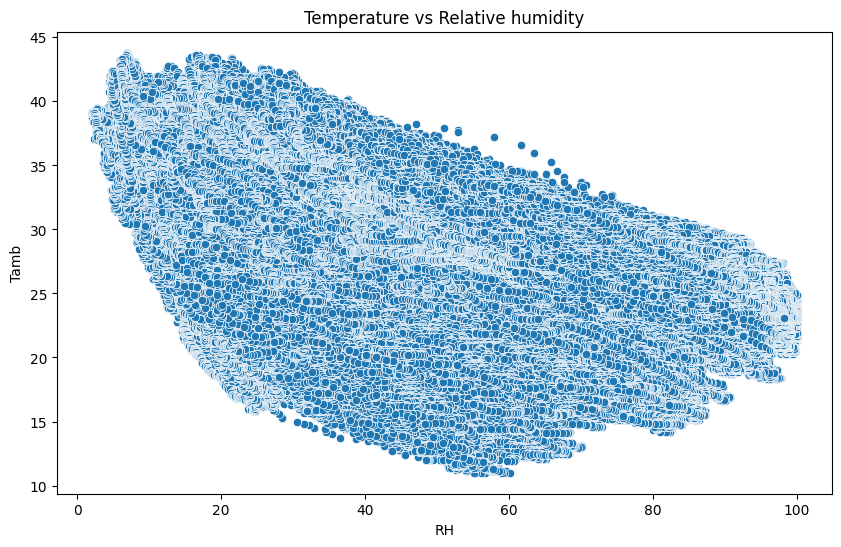

In [51]:
#tempreture analysis
#tempreature vs.relative humidity
plt.figure(figsize=(10,6))
sns.scatterplot(x='RH',y='Tamb',data=df)
plt.title('Temperature vs Relative humidity')
plt.show()

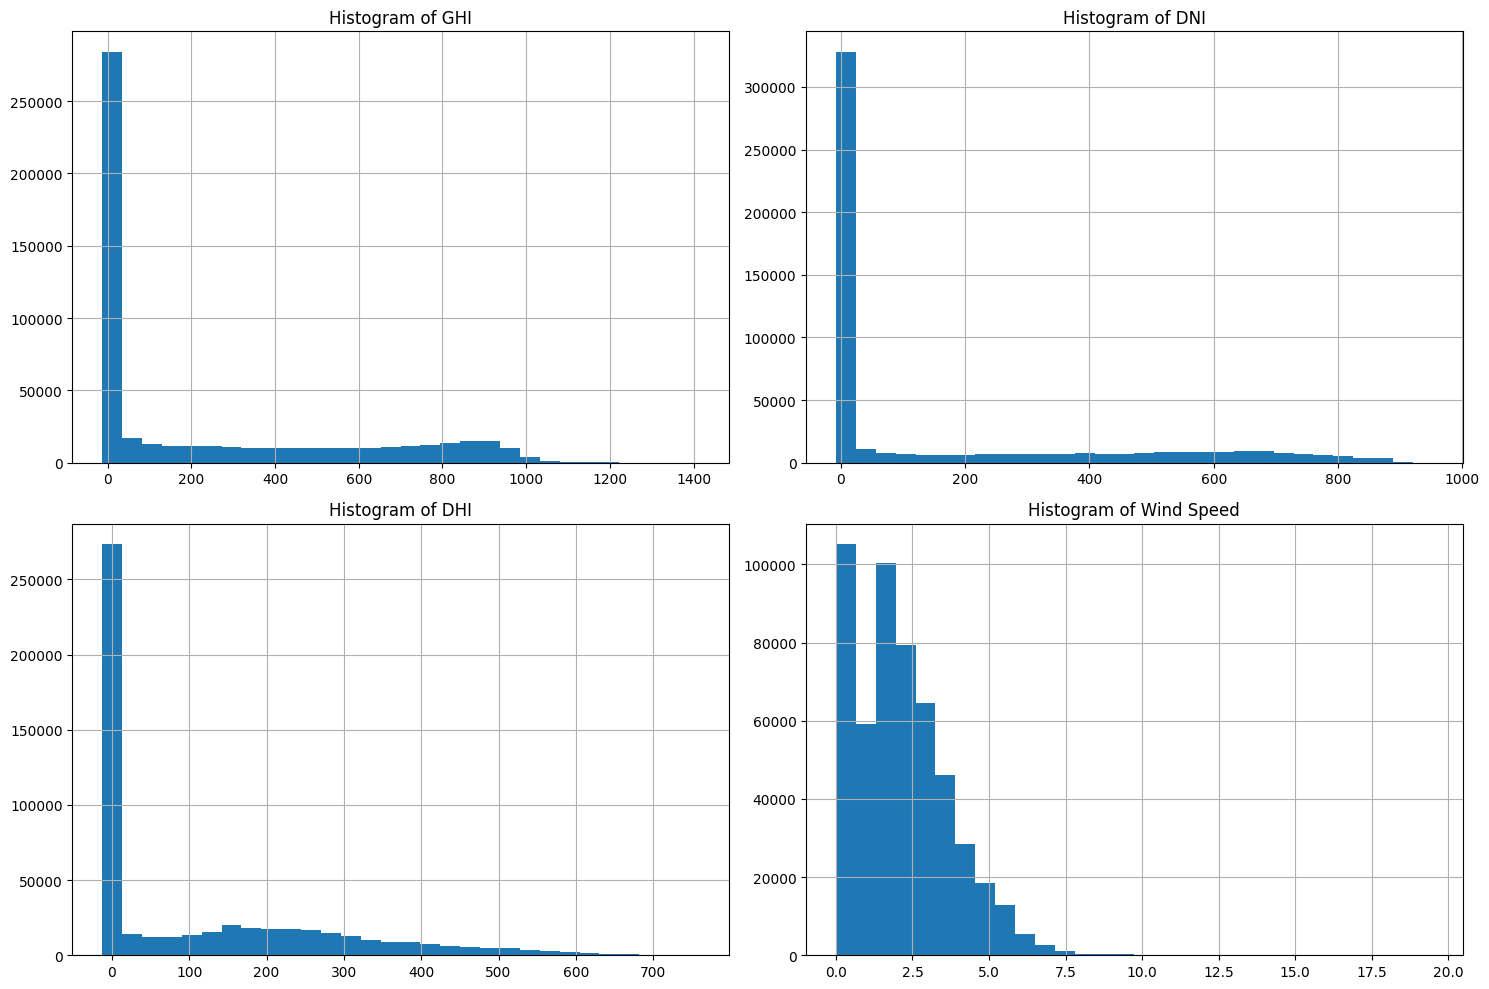

In [52]:
# Plot histograms for variables
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
df['GHI'].hist(bins=30)
plt.title('Histogram of GHI')
plt.subplot(2, 2, 2)
df['DNI'].hist(bins=30)
plt.title('Histogram of DNI')
plt.subplot(2, 2, 3)
df['DHI'].hist(bins=30)
plt.title('Histogram of DHI')
plt.subplot(2, 2, 4)
df['WS'].hist(bins=30)
plt.title('Histogram of Wind Speed')
plt.tight_layout()
plt.show()


In [53]:
# Z-score for detecting anomalies
df_z_scores = df.copy()
for col in numeric_columns:
    df_z_scores[col + '_zscore'] = stats.zscore(df[col].dropna())


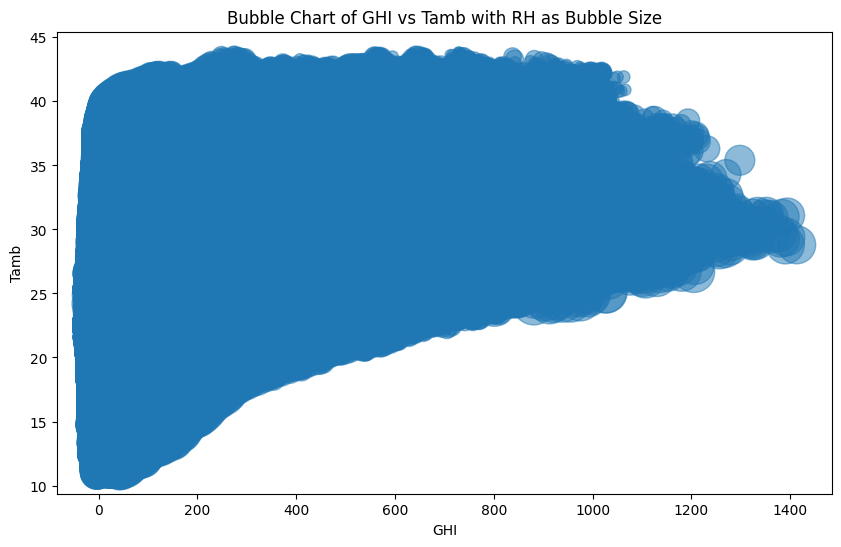

In [54]:
# Bubble chart GHI vs Tamb with bubble size representing RH
plt.figure(figsize=(10, 6))
plt.scatter(df['GHI'], df['Tamb'], s=df['RH']*10, alpha=0.5)
plt.xlabel('GHI')
plt.ylabel('Tamb')
plt.title('Bubble Chart of GHI vs Tamb with RH as Bubble Size')
plt.show()


In [55]:
#cleaning the data
# Handling missing values
df_cleaned = df.dropna(subset=['Comments'])  # Example: Dropping rows where Comments are null
df_cleaned.to_csv('../data/benin-malanville_cleaned.csv', index=False)
